In [1]:
# TODO: 1/31/2023 - find new light curve examples

In [2]:
# Start small and save your time.

In [3]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()

# for calculations
import numpy as np 
import math

import matplotlib.pyplot as plt # for plotting

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

from datetime import date

from ipynb.fs.full.MyFunctions_00 import *

In [4]:
print(timestamp())

06-02-23


In [5]:
# read in saved Pr tables
voids_Pr = read_data_db('VOIDS_Pr_' + 'new_' + '04-11-23') # timestamp())
walls_Pr = read_data_db('WALLS_Pr_' + 'new_' + '04-11-23') # timestamp())

read VOIDS_Pr_new_04-11-23
read WALLS_Pr_new_04-11-23


In [6]:
all_Pr = pd.concat([voids_Pr, walls_Pr], ignore_index = True)

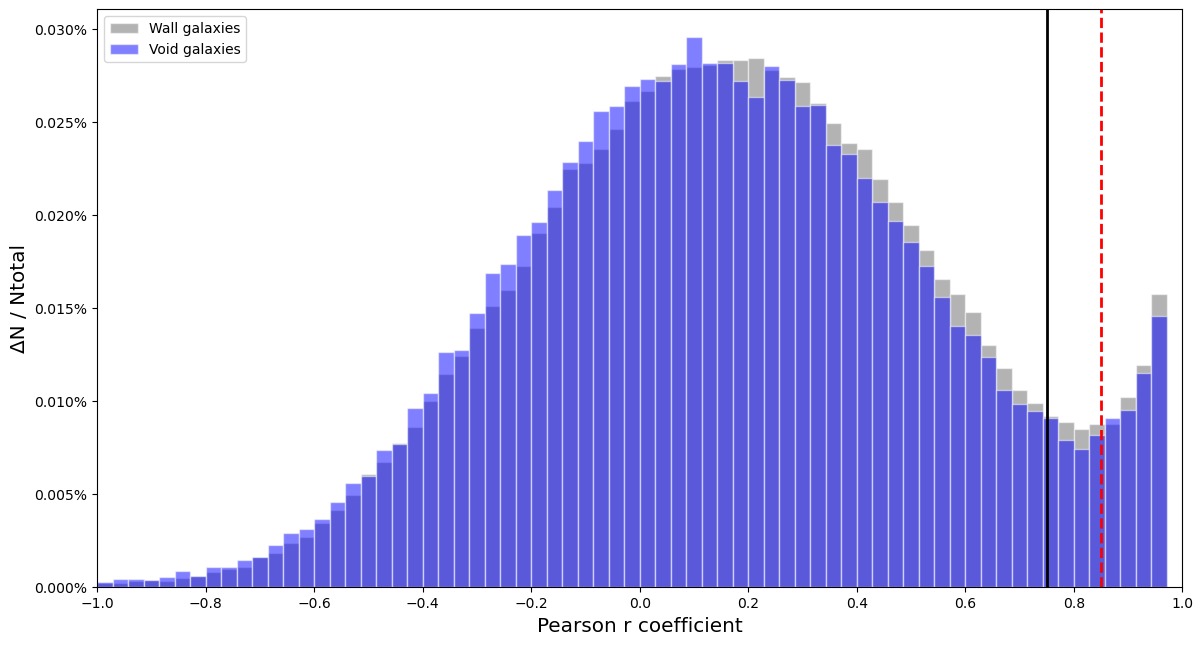

In [7]:
# plot distribution curve of Pearson coefficients of each object

fig, ax = plt.subplots(figsize = (14, 7.5))

# fig.suptitle('Distribution of the Pearson correlation coefficient between W1 and W2', fontsize = 'x-large')

# plot a histogram with 80 bins to avoid overplotting

# ax.hist(all_Pr['Pr'],
#         bins = np.linspace(all_Pr['Pr'].min(), all_Pr['Pr'].max(), num = 80, endpoint = False),
#         color = "lightgrey",
#         edgecolor = 'white',
#         linewidth = 1, 
#         label = 'Total'
#        ) 

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 3))

# filled bars

ax.hist(walls_Pr['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "dimgray",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Wall galaxies',
        alpha = 0.5,
        weights = np.ones_like(walls_Pr['Pr']) / len(walls_Pr['Pr'])
       ) 

ax.hist(voids_Pr['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "blue",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Void galaxies',
        alpha = 0.5,
        weights = np.ones_like(voids_Pr['Pr']) / len(voids_Pr['Pr'])
       ) 

# lines

# ax.hist(walls_Pr['Pr'],
#         bins = np.linspace(-1, 1, num = 70, endpoint = False),
#         edgecolor = 'gold',
#         linewidth = 1.5, 
#         label = 'Wall galaxies',
#         alpha = 1,
#         weights = np.ones_like(walls_Pr['Pr']) / len(walls_Pr['Pr']),
#         histtype = 'step'
#        ) 

# ax.hist(voids_Pr['Pr'],
#         bins = np.linspace(-1, 1, num = 70, endpoint = False),
#         linestyle = 'dotted',
#         edgecolor = 'dodgerblue',
#         linewidth = 1.5, 
#         label = 'Void galaxies',
#         alpha = 1,
#         weights = np.ones_like(voids_Pr['Pr']) / len(voids_Pr['Pr']),
#         histtype = 'step'
#        ) 

# plot a vertical line above which we define variable galaxies
# ax.axvline(x = 0.4, color = 'red') # arbitrary right now

ax.axvline(x = 0.75, 
          color = 'black',
          linestyle = "solid",
          linewidth = 2)

ax.axvline(x = 0.85, 
          color = 'red',
              linestyle = "dashed",
              linewidth = 2)


ax.set_ylabel('ΔN / Ntotal', size = 'x-large')
ax.set_xlabel('Pearson r coefficient', size = 'x-large')
ax.legend(loc = 'upper left')
ax.set_xlim(-1.00, 1.00)

ax.xaxis.set_ticks(np.arange(start = -1.0, stop = 1.1, step = 0.20))
plt.rcParams.update({'font.size': 16})


# fig.savefig('Figures/iPoster_Pr-dist_' + 'new_' + timestamp()+ '.png', dpi = 600, bbox_inches = 'tight')
plt.show()

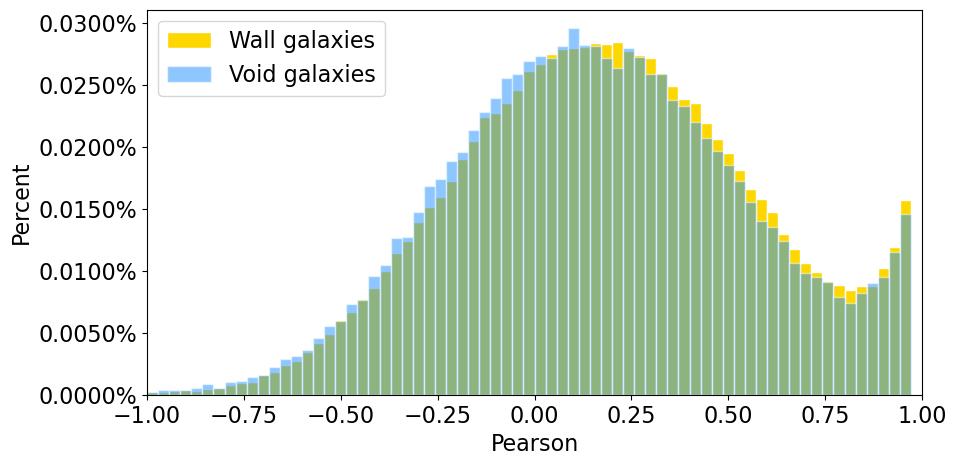

In [8]:
# plot distribution curve of Pearson coefficients of each object

fig, ax = plt.subplots(figsize = (10, 5))

# fig.suptitle('Distribution of the Pearson correlation coefficient between W1 and W2', fontsize = 'x-large')

# plot a histogram with 80 bins to avoid overplotting

# ax.hist(all_Pr['Pr'],
#         bins = np.linspace(all_Pr['Pr'].min(), all_Pr['Pr'].max(), num = 80, endpoint = False),
#         color = "lightgrey",
#         edgecolor = 'white',
#         linewidth = 1, 
#         label = 'Total'
#        ) 

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# filled bars

ax.hist(walls_Pr['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "gold",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Wall galaxies',
        alpha = 1,
        weights = np.ones_like(walls_Pr['Pr']) / len(walls_Pr['Pr'])
       ) 

ax.hist(voids_Pr['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "dodgerblue",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Void galaxies',
        alpha = 0.5,
        weights = np.ones_like(voids_Pr['Pr']) / len(voids_Pr['Pr'])
       ) 

# lines

# ax.hist(walls_Pr['Pr'],
#         bins = np.linspace(-1, 1, num = 70, endpoint = False),
#         edgecolor = 'gold',
#         linewidth = 1.5, 
#         label = 'Wall galaxies',
#         alpha = 1,
#         weights = np.ones_like(walls_Pr['Pr']) / len(walls_Pr['Pr']),
#         histtype = 'step'
#        ) 

# ax.hist(voids_Pr['Pr'],
#         bins = np.linspace(-1, 1, num = 70, endpoint = False),
#         linestyle = 'dotted',
#         edgecolor = 'dodgerblue',
#         linewidth = 1.5, 
#         label = 'Void galaxies',
#         alpha = 1,
#         weights = np.ones_like(voids_Pr['Pr']) / len(voids_Pr['Pr']),
#         histtype = 'step'
#        ) 

# plot a vertical line above which we define variable galaxies
# ax.axvline(x = 0.4, color = 'red') # arbitrary right now
ax.set_xlabel('Pearson')
ax.set_ylabel('Percent')
ax.legend(loc = 'upper left')
ax.set_xlim(-1.00, 1.00)

# fig.savefig('Figures/Pr-dist_' + 'new_' + timestamp()+ '.png', dpi = 300)
plt.show()

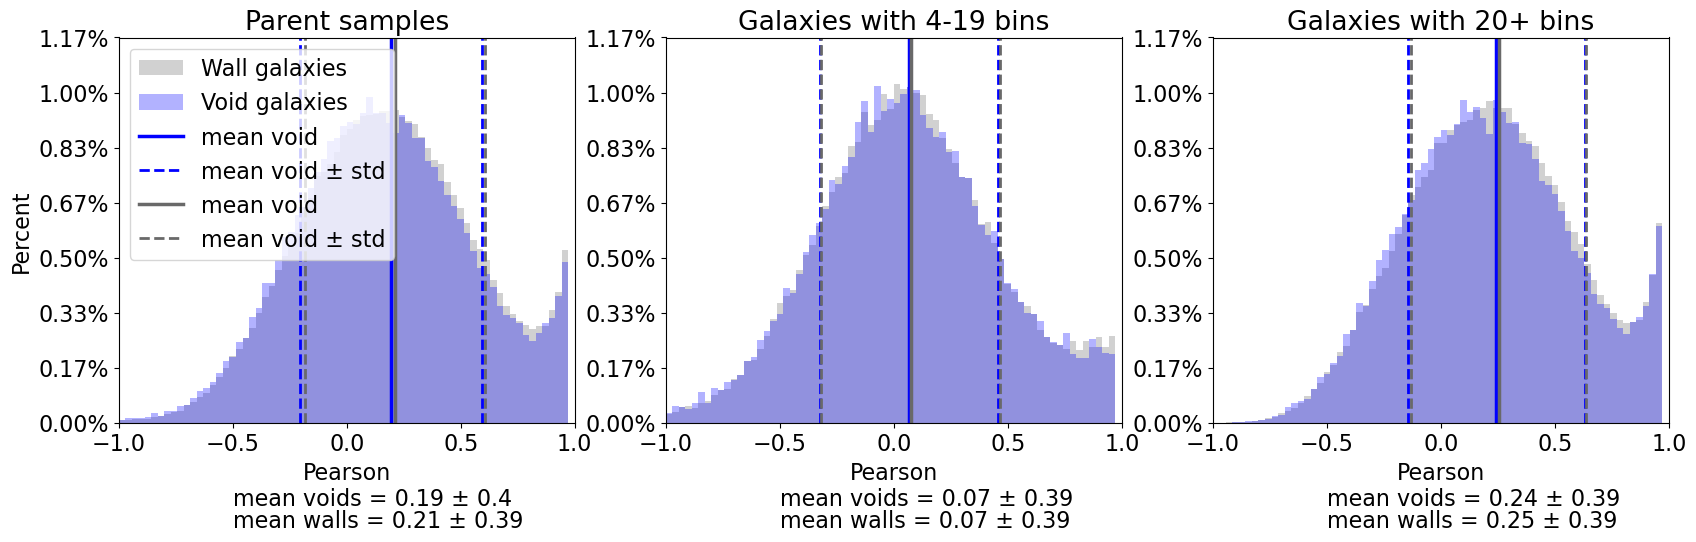

In [9]:
# Remove weird r values that occur because the object has < 3 bins for plotting

voids_Pr19 = voids_Pr[(voids_Pr['num_obj'] < 20)]
walls_Pr19 = walls_Pr[(walls_Pr['num_obj'] < 20)]

voids_Pr20 = voids_Pr[(voids_Pr['num_obj'] >= 20)]
walls_Pr20 = walls_Pr[(walls_Pr['num_obj'] >= 20)]

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

# filled bars

ax[0].hist(walls_Pr['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "dimgray",
#         edgecolor = 'white',
#         linewidth = 1, 
        label = 'Wall galaxies',
        alpha = 0.3,
        weights = np.ones_like(walls_Pr['Pr']) / len(walls_Pr['Pr'])
       ) 

ax[0].hist(voids_Pr['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "blue",
#         edgecolor = 'white',
#         linewidth = 1, 
        label = 'Void galaxies',
        alpha = 0.3,
        weights = np.ones_like(voids_Pr['Pr']) / len(voids_Pr['Pr'])
       )

ax[1].hist(walls_Pr19['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "dimgray",
#         edgecolor = 'white',
#         linewidth = 1, 
        label = 'Wall galaxies',
        alpha = 0.3,
        weights = np.ones_like(walls_Pr19['Pr']) / len(walls_Pr19['Pr'])
       ) 

ax[1].hist(voids_Pr19['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "blue",
#         edgecolor = 'white',
#         linewidth = 1, 
        label = 'Void galaxies',
        alpha = 0.3,
        weights = np.ones_like(voids_Pr19['Pr']) / len(voids_Pr19['Pr'])
       )

ax[2].hist(walls_Pr20['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "dimgray",
#         edgecolor = 'white',
#         linewidth = 1, 
        label = 'Wall galaxies',
        alpha = 0.3,
        weights = np.ones_like(walls_Pr20['Pr']) / len(walls_Pr20['Pr'])
       ) 

ax[2].hist(voids_Pr20['Pr'],
        bins = np.linspace(-1, 1, num = 70, endpoint = False),
        color = "blue",
#         edgecolor = 'white',
#         linewidth = 1, 
        label = 'Void galaxies',
        alpha = 0.3,
        weights = np.ones_like(voids_Pr20['Pr']) / len(voids_Pr20['Pr'])
       )

ax[0].set_title('Parent samples')
ax[1].set_title('Galaxies with 4-19 bins')
ax[2].set_title('Galaxies with 20+ bins')

# for means and standard deviations
plot_mean(0, voids_Pr['Pr'], walls_Pr['Pr'], ax)
plot_mean(1, voids_Pr19['Pr'], walls_Pr19['Pr'], ax)
plot_mean(2, voids_Pr20['Pr'], walls_Pr20['Pr'], ax)

ax[0].set_ylabel('Percent')
ax[0].legend(loc = 'upper left')

for i in range(3):
    
    ax[i].yaxis.set_major_formatter(mtick.PercentFormatter(3))
    ax[i].set_xlabel('Pearson')
    ax[i].set_xlim(-1.00, 1.00)
    ax[i].set_ylim(0, 0.035)

# fig.savefig('Figures/Pr-SplitByBin_' + 'new_' + timestamp()+ '.png', dpi = 300)
plt.show()

In [10]:
# find the fraction of galaxies in both groups that have r above 0.75 (visible dip in histogram)

line = 0.75


voids_Pr75 = len(voids_Pr[(voids_Pr['Pr'] > line)]) / len(voids_Pr)
err_voids_Pr75 = get_err(len(voids_Pr[(voids_Pr['Pr'] > line)]), len(voids_Pr))

voids_19Pr75 = len(voids_Pr19[(voids_Pr19['Pr'] > line)]) / len(voids_Pr19)
err_voids_19Pr75 = get_err(len(voids_Pr19[(voids_Pr19['Pr'] > line)]), len(voids_Pr19))

voids_20Pr75 = len(voids_Pr20[(voids_Pr20['Pr'] > line)]) / len(voids_Pr20)
err_voids_20Pr75 = get_err(len(voids_Pr20[(voids_Pr20['Pr'] > line)]), len(voids_Pr20))


walls_Pr75 = len(walls_Pr[(walls_Pr['Pr'] > line)]) / len(walls_Pr)
err_walls_Pr75 = get_err(len(walls_Pr[(walls_Pr['Pr'] > line)]), len(walls_Pr))

walls_19Pr75 = len(walls_Pr19[(walls_Pr19['Pr'] > line)]) / len(walls_Pr19)
err_walls_19Pr75 = get_err(len(walls_Pr19[(walls_Pr19['Pr'] > line)]), len(walls_Pr19))

walls_20Pr75 = len(walls_Pr20[(walls_Pr20['Pr'] > line)]) / len(walls_Pr20)
err_walls_20Pr75 = get_err(len(walls_Pr20[(walls_Pr20['Pr'] > line)]), len(walls_Pr20))

# assemble a table to summarize the fraction of galaxies in each of three metrics
# to see whether voids and walls vary in AGN abundance
percent_table = pd.DataFrame([['Parent voids', 
                               round(len(voids_Pr) / len(voids_Pr), 3), 
                               str(round(voids_Pr75, 2)) + err_voids_Pr75
                              ],
                              
                              ['Parent walls', 
                               round(len(walls_Pr) / len(walls_Pr), 3),
                               str(round(walls_Pr75, 2)) + err_walls_Pr75
                              ],
                              
                              [' ', 
                               ' ', 
                               ' '
                              ],
                             
                             ['Voids with 4-19 bins', 
                               round(len(voids_Pr19) / len(voids_Pr), 3), 
                               str(round(voids_19Pr75, 2)) + err_voids_19Pr75
                              ],
                              
                             ['Walls with 4-19 bins', 
                               round(len(walls_Pr19) / len(walls_Pr), 3),
                               str(round(walls_19Pr75, 2)) + err_walls_19Pr75
                              ],
                            
                              [' ', 
                               ' ', 
                               ' '
                              ],
                             
                              ['Voids with 20+ bins', 
                               round(len(voids_Pr20) / len(voids_Pr), 3),
                               str(round(voids_20Pr75, 2)) + err_voids_20Pr75
                              ],
                              
                             ['Walls with 20+ bins', 
                               round(len(walls_Pr20) / len(walls_Pr), 3),
                               str(round(walls_20Pr75, 2)) + err_walls_20Pr75
                              ]
                             ],
                             
                             columns = ['Galaxy group', 
                                        'Fraction of Parent',
                                        'Fraction with r > ' + str(line)
                                       ]
                            )

HTML(percent_table.to_html(index = False))

Galaxy group,Fraction of Parent,Fraction with r > 0.75
Parent voids,1.0,0.11 ± 0.012
Parent walls,1.0,0.11 ± 0.007
,,
Voids with 4-19 bins,0.283,0.06 ± 0.03
Walls with 4-19 bins,0.234,0.06 ± 0.018
,,
Voids with 20+ bins,0.717,0.13 ± 0.013
Walls with 20+ bins,0.766,0.13 ± 0.007


In [11]:
voids_full = read_data('voids_full_' + 'new_' + '04-10-23') # timestamp())
walls_full = read_data('walls_full_' + 'new_' + '04-11-23') # timestamp())

read voids_full_new_04-10-23
read walls_full_new_04-11-23


In [12]:
voids_full = voids_full.dropna(subset = ['object_tag'])
walls_full = walls_full.dropna(subset = ['object_tag'])

In [13]:
voids_Pr.head()

,object_tag,num_obj,Pr
0,75.0,24.0,0.933297
1,95.0,24.0,0.948802
2,121.0,23.0,0.987329
3,127.0,22.0,0.998411
4,128.0,22.0,0.900567


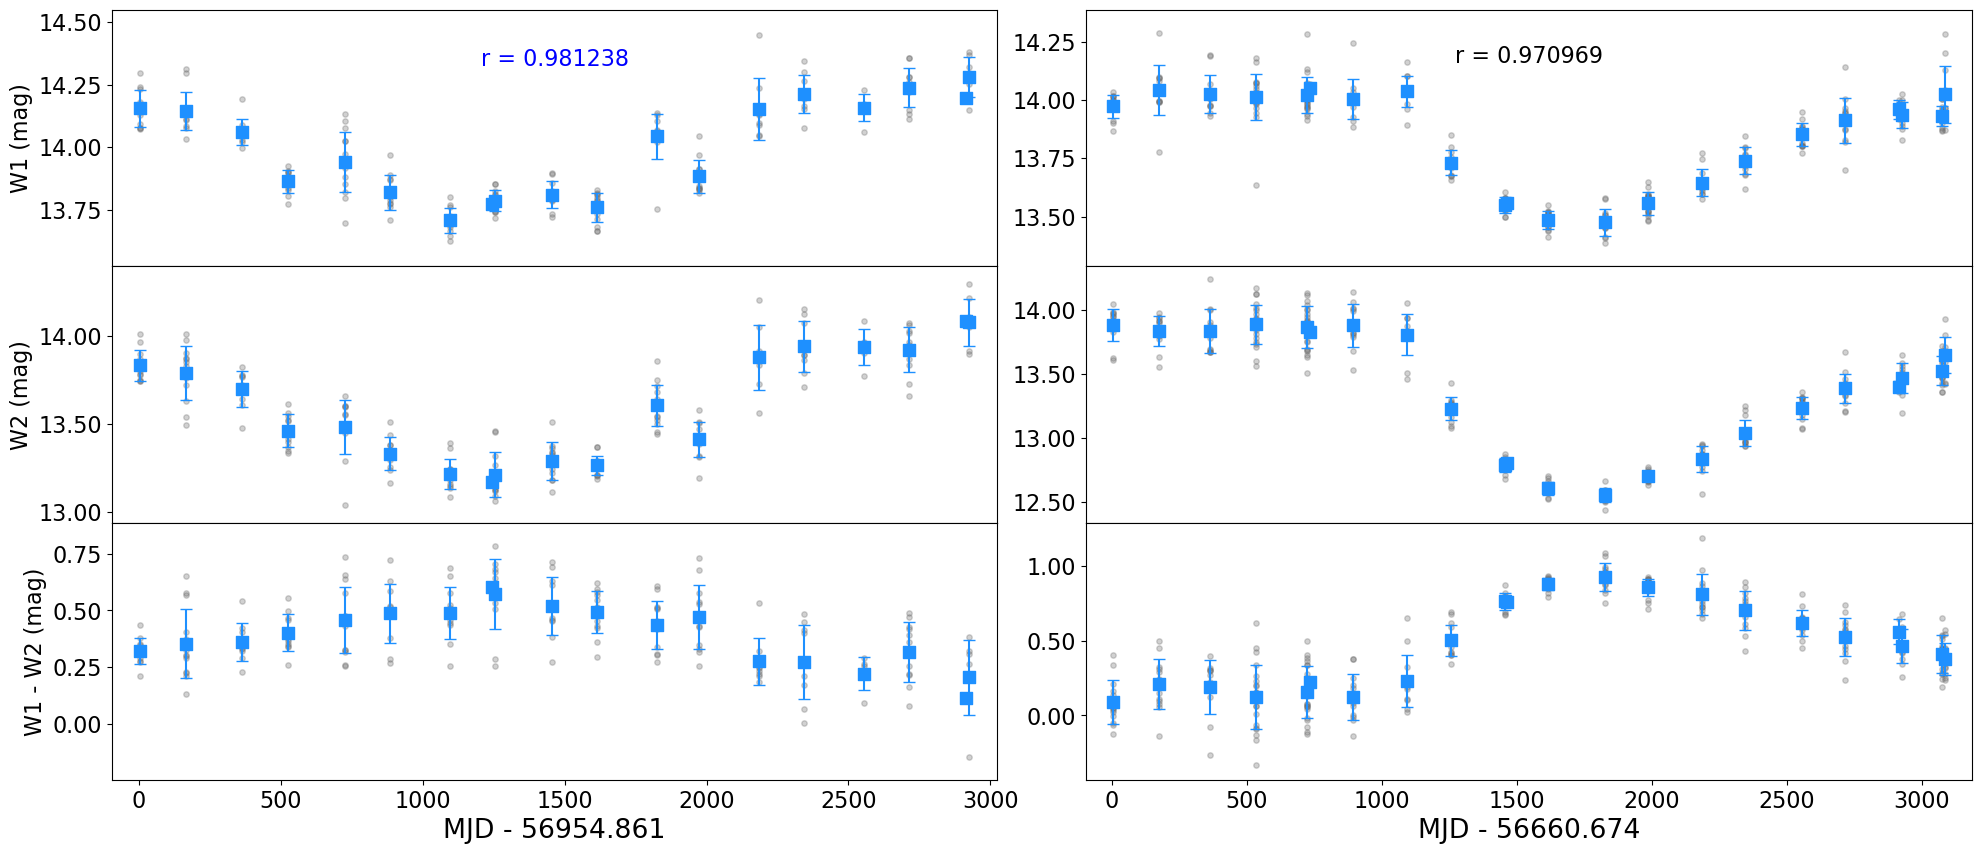

In [14]:
title_fig = "Highly Variable Objects with W1-W2 < 0.5"
num_v = 435718
num_w = 552295
save = False

fig, axs = plt.subplots(3, 2, figsize = (24, 10), sharex = 'col')

#     fig.suptitle(title_fig, fontsize = 'x-large')

# --------------------
t = num_v
full = voids_full
g = "void"
ax1 = axs[0, 0]
ax2 = axs[1, 0]
ax3 = axs[2, 0]
# plot light curve for a given object
# enter object tag for the desired object
# generate all columns and binned data for that object

full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

test_r = all_Pr[(all_Pr['object_tag'] == t)]['Pr']

# add title that automatically includes the name of the plotted object
#     ax1.set_title(g + ' object NSAID: ' + str(t) + " (r = " + test_r.to_string(index = False) + ")", 
#                  fontsize = 'x-large')

ax1.text((full_tag['mjd_binned'].min() + full_tag['mjd_binned'].max()) / 2.0, 
         full_tag['w1mpro'].max() - 0.1,
         "r = " + test_r.to_string(index = False),
          c = 'blue', ha = 'center', va = 'center', fontsize = '16')

# scatter individual measurements using the full_tag table
# different colors and bands are used for each subplot
ax1.scatter(full_tag['mjd_binned'], 
               full_tag['w1mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

ax2.scatter(full_tag['mjd_binned'], 
               full_tag['w2mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

ax3.scatter(full_tag['mjd_binned'], 
               full_tag['W1-W2'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

# scatter the mean points on top of the individual measurements, all on the same binned x-values
ax1.scatter(mean['mjd_binned'], 
               mean['mean_W1'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

ax2.scatter(mean['mjd_binned'], 
               mean['mean_W2'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

ax3.scatter(mean['mjd_binned'], 
               mean['mean_color'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

# add error bars for means using the standard deviations calculated in the mean table
ax1.errorbar(mean['mjd_binned'], 
                mean['mean_W1'],
                yerr = mean['std_W1'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

ax2.errorbar(mean['mjd_binned'], 
                mean['mean_W2'],
                yerr = mean['std_W2'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

ax3.errorbar(mean['mjd_binned'], 
                mean['mean_color'],
                yerr = mean['std_color'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

# automatically set the axis limits for the graph based on the range of the plotted data
ax1.set_xlim([mean['mjd_binned'].min() - 100, mean['mjd_binned'].max() + 100])
ax1.set_ylim([full_tag['w1mpro'].min() - 0.1, full_tag['w1mpro'].max() + 0.1])
ax2.set_ylim([full_tag['w2mpro'].min() - 0.1, full_tag['w2mpro'].max() + 0.1])
ax3.set_ylim([full_tag['W1-W2'].min() - 0.1, full_tag['W1-W2'].max() + 0.1])

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# set all axis labels, including mjd that autmatically includes the value we subtracted in order to start at zero
ax3.set_xlabel('MJD - ' + str(round(full_tag['mjd'].min(), 3)), fontsize = 'large')

# ----------------

# --------------------
t = num_w
full = walls_full
g = "wall"
ax1 = axs[0, 1]
ax2 = axs[1, 1]
ax3 = axs[2, 1]
# plot light curve for a given object
# enter object tag for the desired object
# generate all columns and binned data for that object

full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

test_r = all_Pr[(all_Pr['object_tag'] == t)]['Pr']

# add title that automatically includes the name of the plotted object
#     ax1.set_title(g + ' object NSAID: ' + str(t) + " (r = " + test_r.to_string(index = False) + ")", 
#                  fontsize = 'x-large')

ax1.text((full_tag['mjd_binned'].min() + full_tag['mjd_binned'].max()) / 2.0, 
         full_tag['w1mpro'].max() - 0.1,
         "r = " + test_r.to_string(index = False),
          c = 'black', ha = 'center', va = 'center', fontsize = '16')

# scatter individual measurements using the full_tag table
# different colors and bands are used for each subplot
ax1.scatter(full_tag['mjd_binned'], 
               full_tag['w1mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

ax2.scatter(full_tag['mjd_binned'], 
               full_tag['w2mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

ax3.scatter(full_tag['mjd_binned'], 
               full_tag['W1-W2'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

# scatter the mean points on top of the individual measurements, all on the same binned x-values
ax1.scatter(mean['mjd_binned'], 
               mean['mean_W1'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

ax2.scatter(mean['mjd_binned'], 
               mean['mean_W2'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

ax3.scatter(mean['mjd_binned'], 
               mean['mean_color'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

# add error bars for means using the standard deviations calculated in the mean table
ax1.errorbar(mean['mjd_binned'], 
                mean['mean_W1'],
                yerr = mean['std_W1'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

ax2.errorbar(mean['mjd_binned'], 
                mean['mean_W2'],
                yerr = mean['std_W2'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

ax3.errorbar(mean['mjd_binned'], 
                mean['mean_color'],
                yerr = mean['std_color'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

# automatically set the axis limits for the graph based on the range of the plotted data
ax1.set_xlim([mean['mjd_binned'].min() - 100, mean['mjd_binned'].max() + 100])
ax1.set_ylim([full_tag['w1mpro'].min() - 0.1, full_tag['w1mpro'].max() + 0.1])
ax2.set_ylim([full_tag['w2mpro'].min() - 0.1, full_tag['w2mpro'].max() + 0.1])
ax3.set_ylim([full_tag['W1-W2'].min() - 0.1, full_tag['W1-W2'].max() + 0.1])

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# set all axis labels, including mjd that autmatically includes the value we subtracted in order to start at zero
ax3.set_xlabel('MJD - ' + str(round(full_tag['mjd'].min(), 3)), fontsize = 'large')

# ----------------

axs[0, 0].set_ylabel('W1 (mag)', fontsize = '16')
axs[1, 0].set_ylabel('W2 (mag)', fontsize = '16')
axs[2, 0].set_ylabel('W1 - W2 (mag)', fontsize = '16')

plt.rcParams.update({'font.size': 16})

plt.subplots_adjust(wspace = 0.10, hspace = 0)

# fig.savefig('Figures/iPoster-curve-mosaic' + str(num_v) + '_' + str(num_w) + '.png', dpi = 600)

plt.show()

In [15]:
voids_parent = read_data_db('voids_parent_colors_' + 'new_' + '04-11-23') # timestamp())
voids_parent[(voids_parent['object_tag'] == num_v)]

read voids_parent_colors_new_04-11-23


,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
48672,435718.0,19.0,0.981238,1,119.673674,15.945938,2080,76,53350,-20.471897,...,0.043,25.4,11.663,0.29,3.7,8.576,0.409,2.7,0.315,2.259


In [16]:
walls_parent = read_data_db('walls_parent_colors_' + 'new_' + '04-11-23') # timestamp())
walls_parent[(walls_parent['object_tag'] == num_w)]

read walls_parent_colors_new_04-11-23


,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
196668,552295.0,22.0,0.970969,0,202.258569,23.685671,2664,25,54524,-20.145489,...,0.036,30.5,11.034,0.113,9.6,8.698,0.367,3.0,0.17,2.801


r = 0.982196


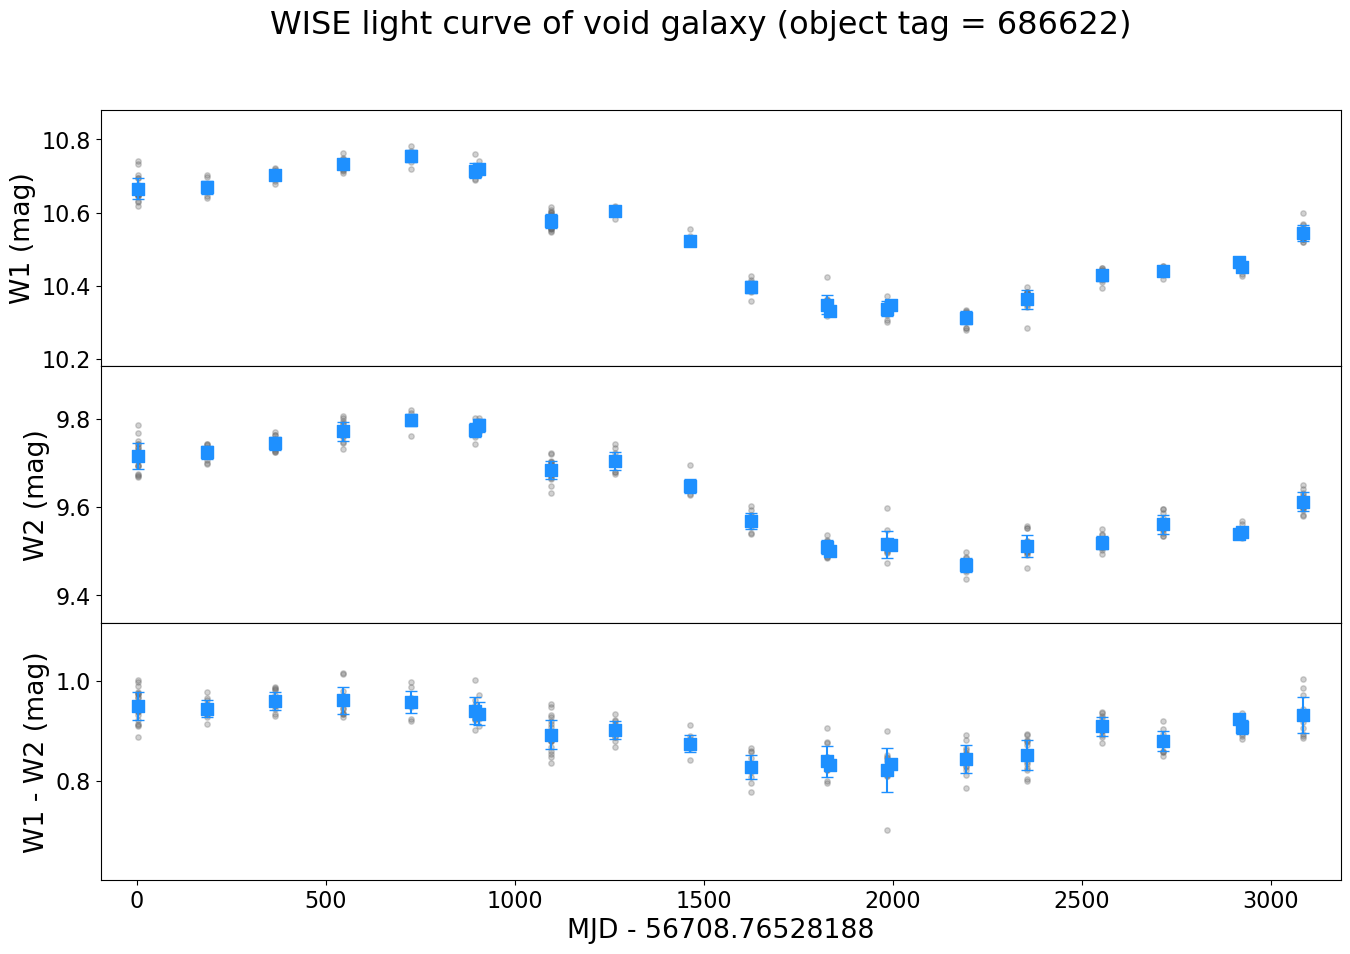

In [17]:
tag_num = 686622

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, voids_full, False)

# bright voids, W1 - W2 > 0.8

r = 0.980973


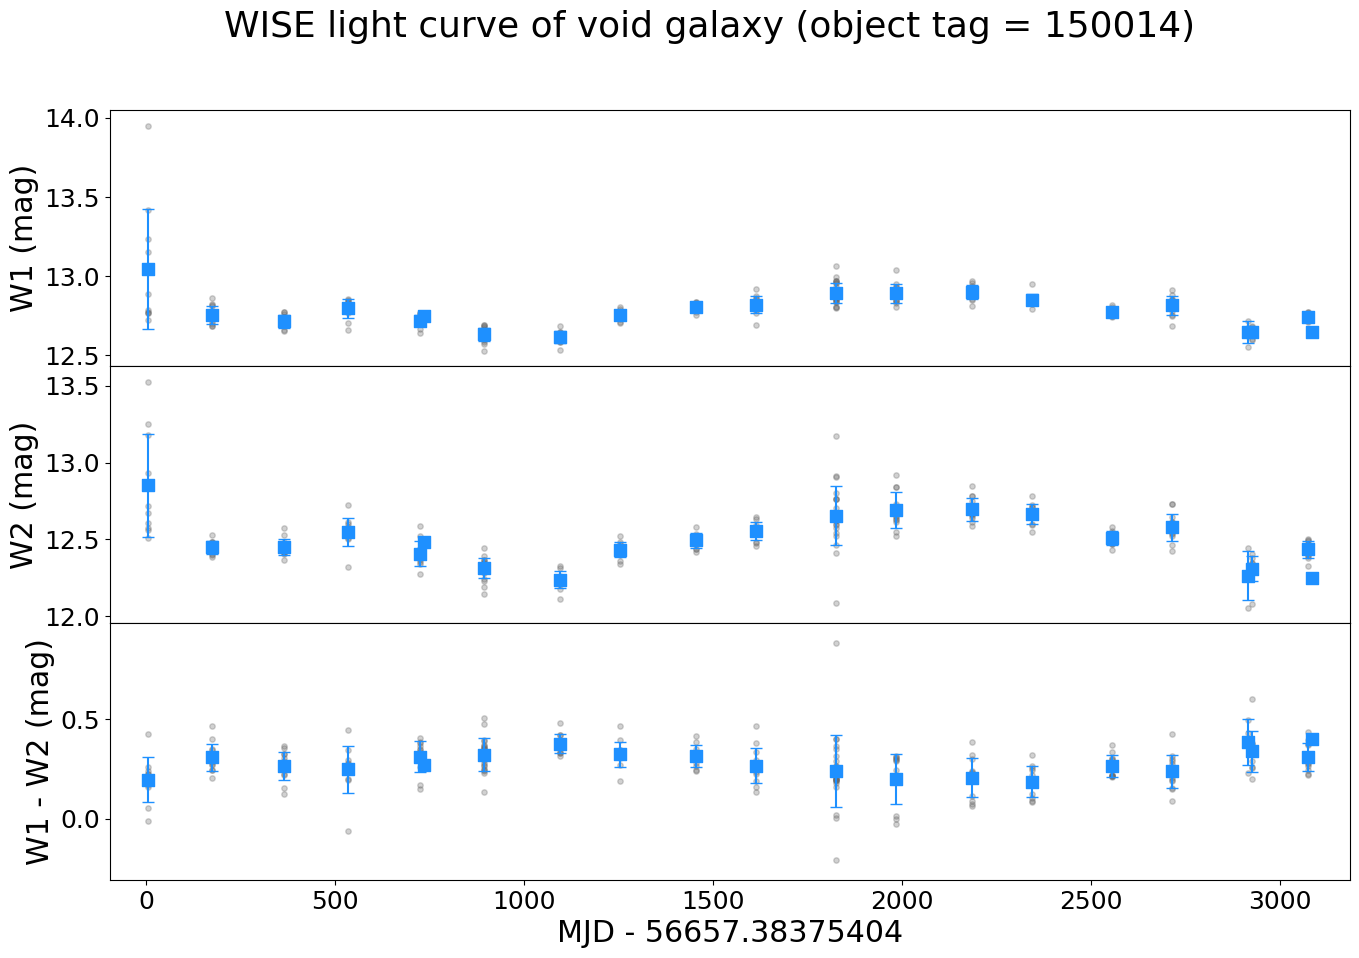

In [18]:
tag_num = 150014

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, voids_full, False)

# bright voids, W1 - W2 = 0.308

r = 0.97566


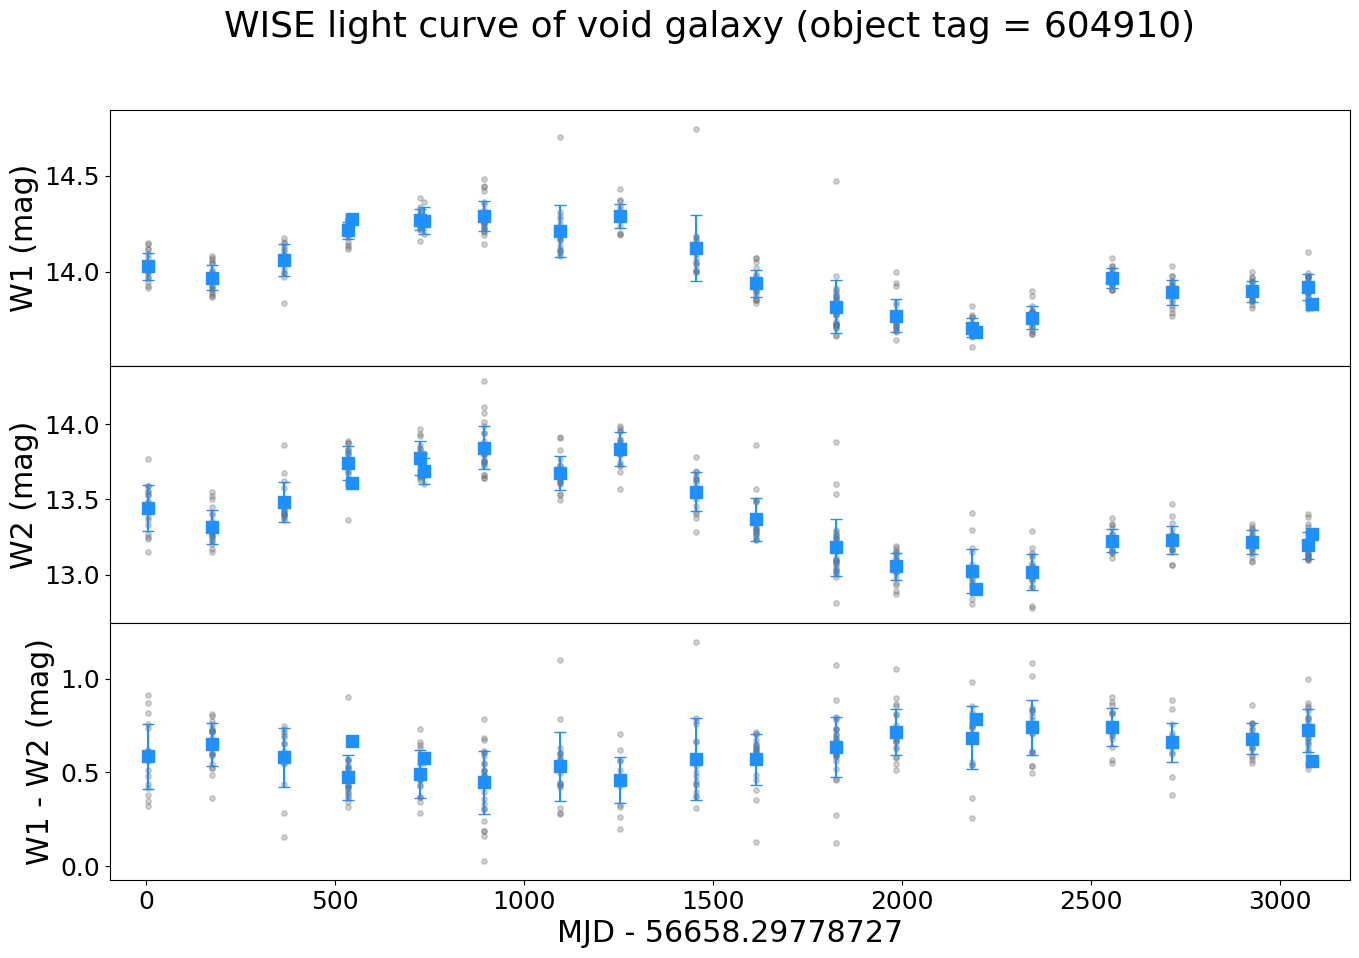

In [19]:
tag_num = 604910

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, voids_full, False)

# bright voids, 0.5 < W1 - W2 < 0.8

r = 0.888055


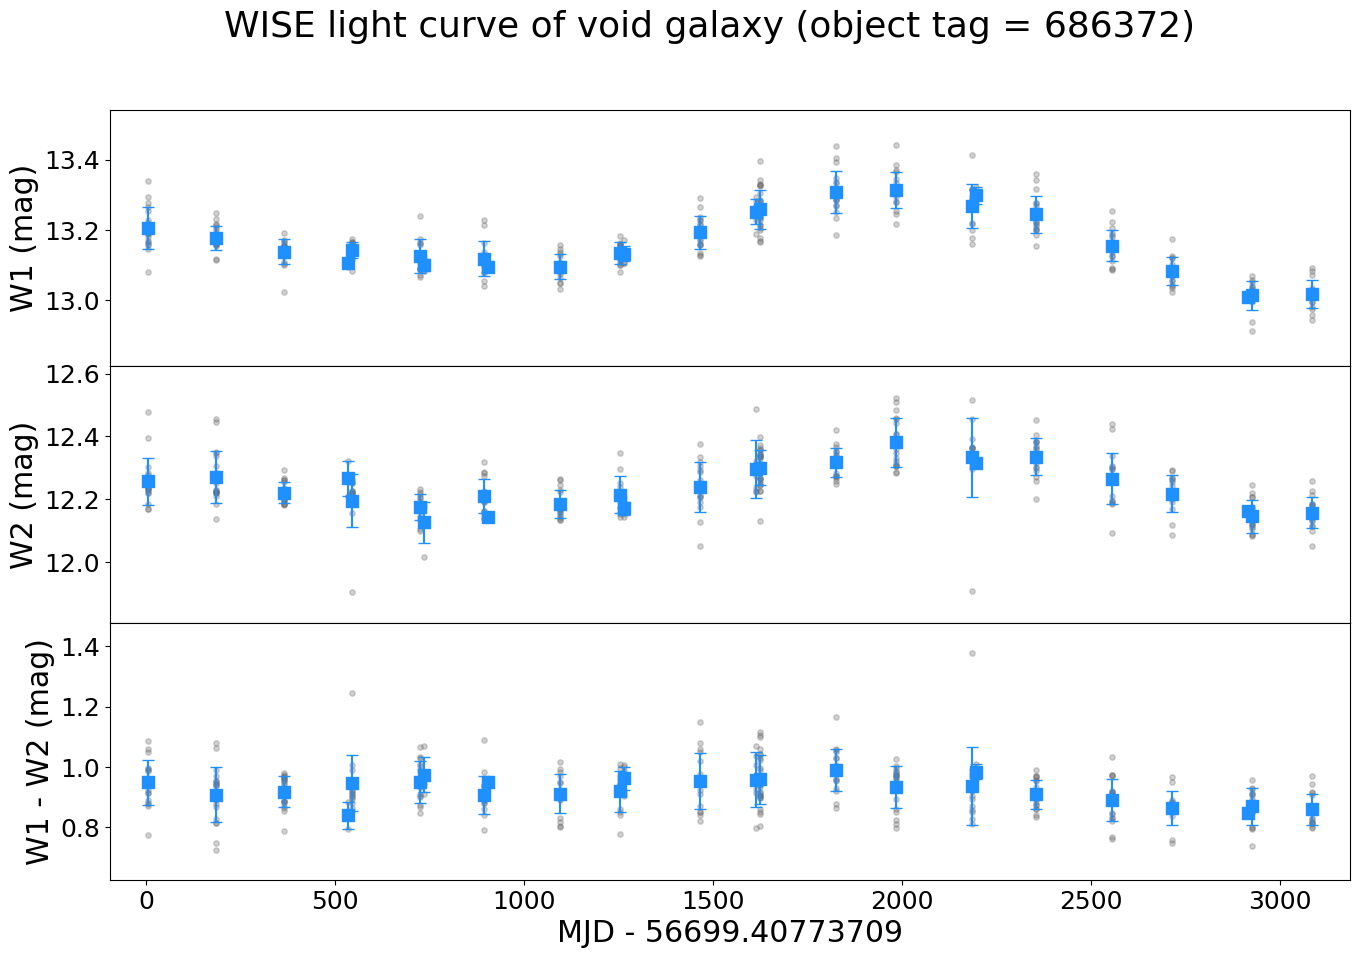

In [20]:
tag_num = 686372

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, walls_full, False)

# dwarf wall, W1 - W2 > 0.8

r = 0.970969


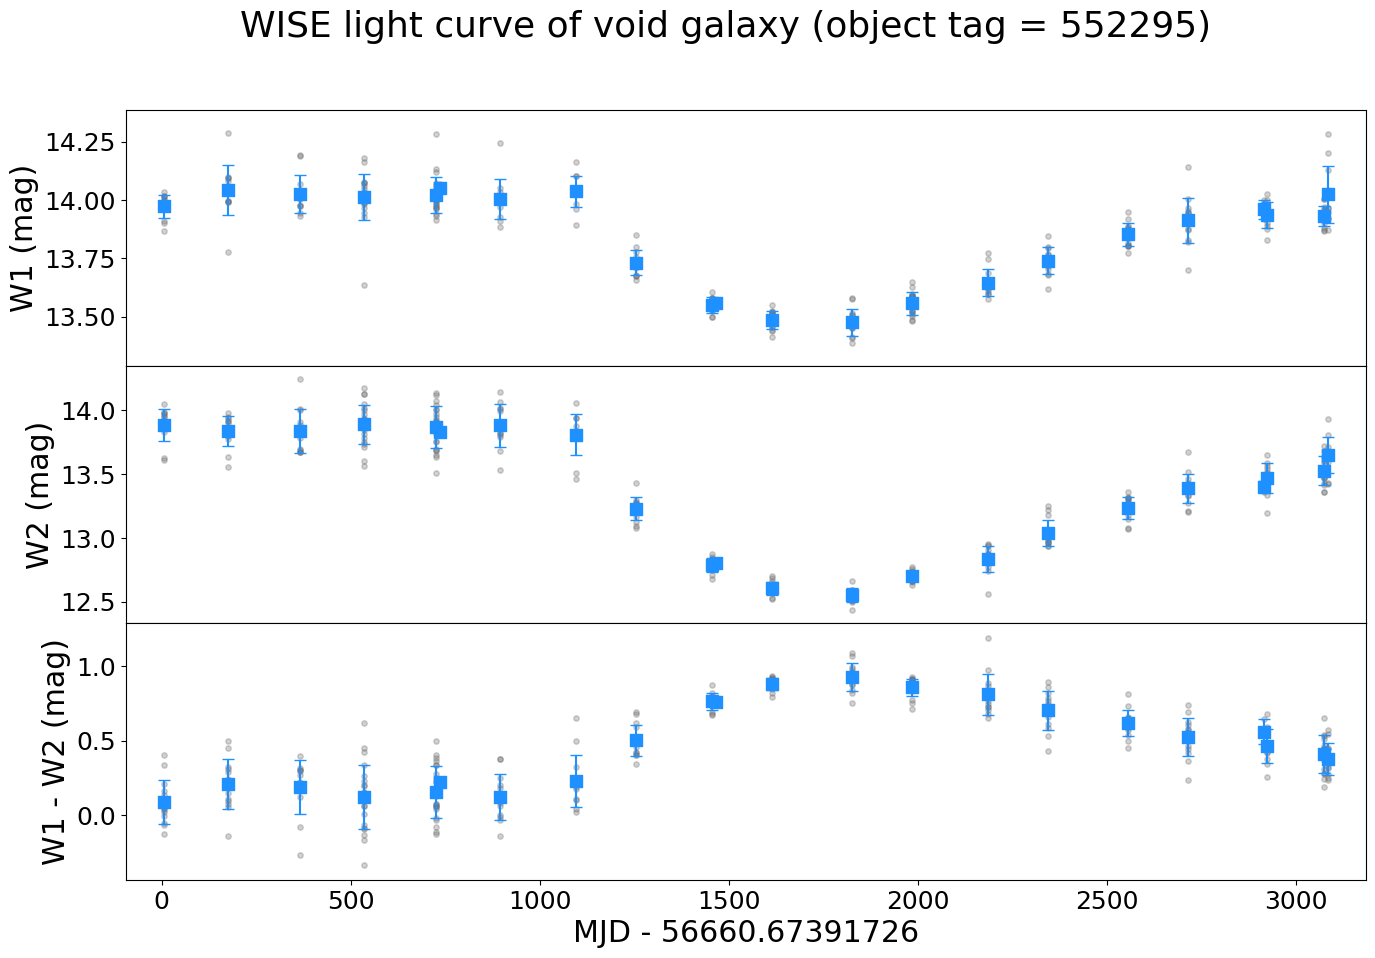

In [21]:
tag_num = 552295


test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, walls_full, False)

# bright wall, W1 - W2 < 0.5

r = 0.868787


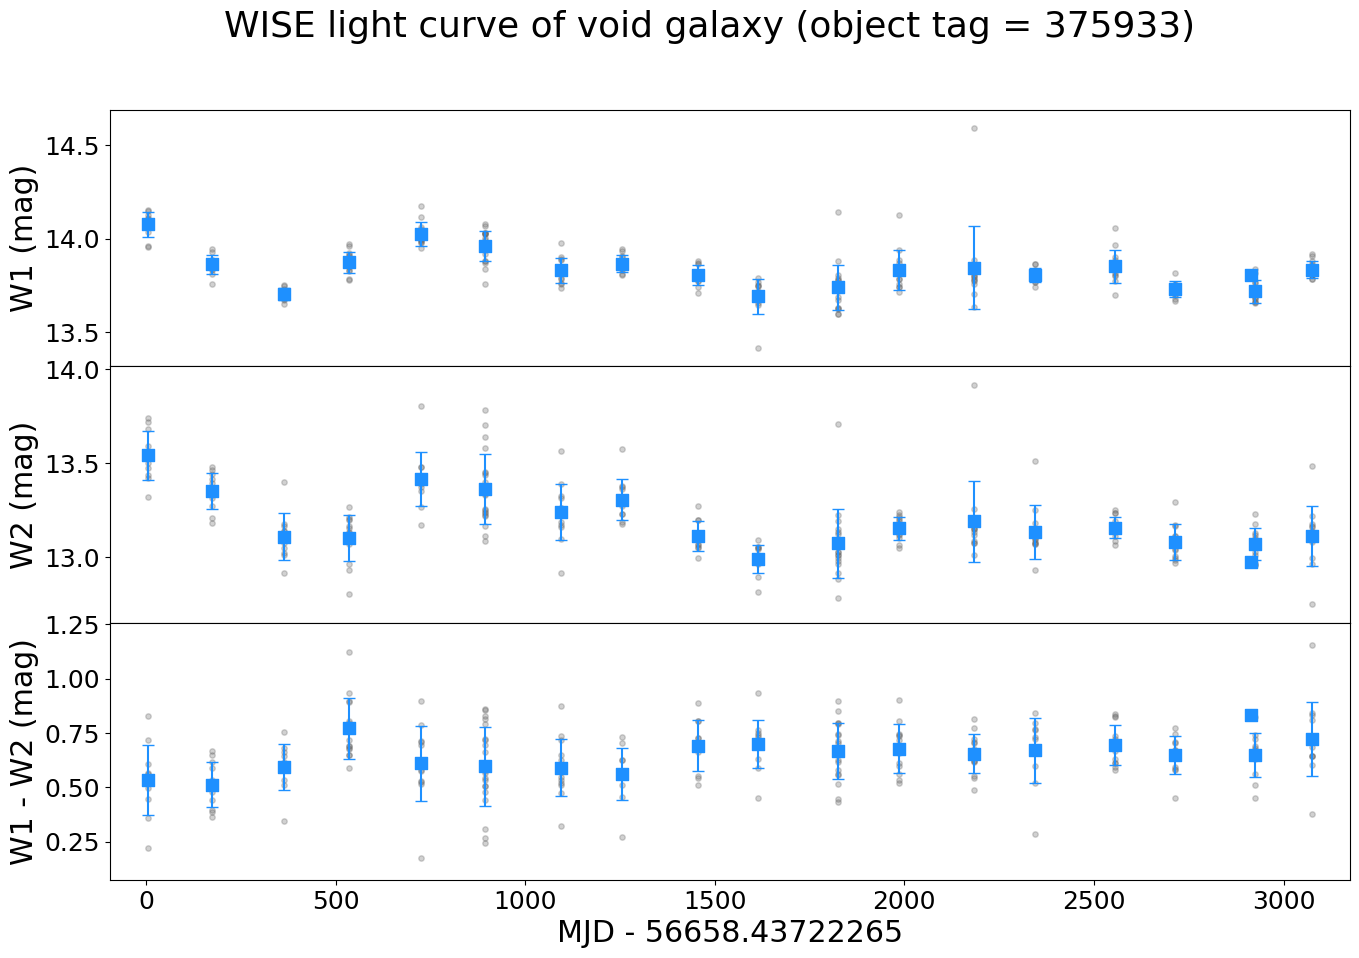

In [22]:
tag_num = 375933

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, walls_full, False)

# main wall, 0.5 < W1 - W2 < 0.8

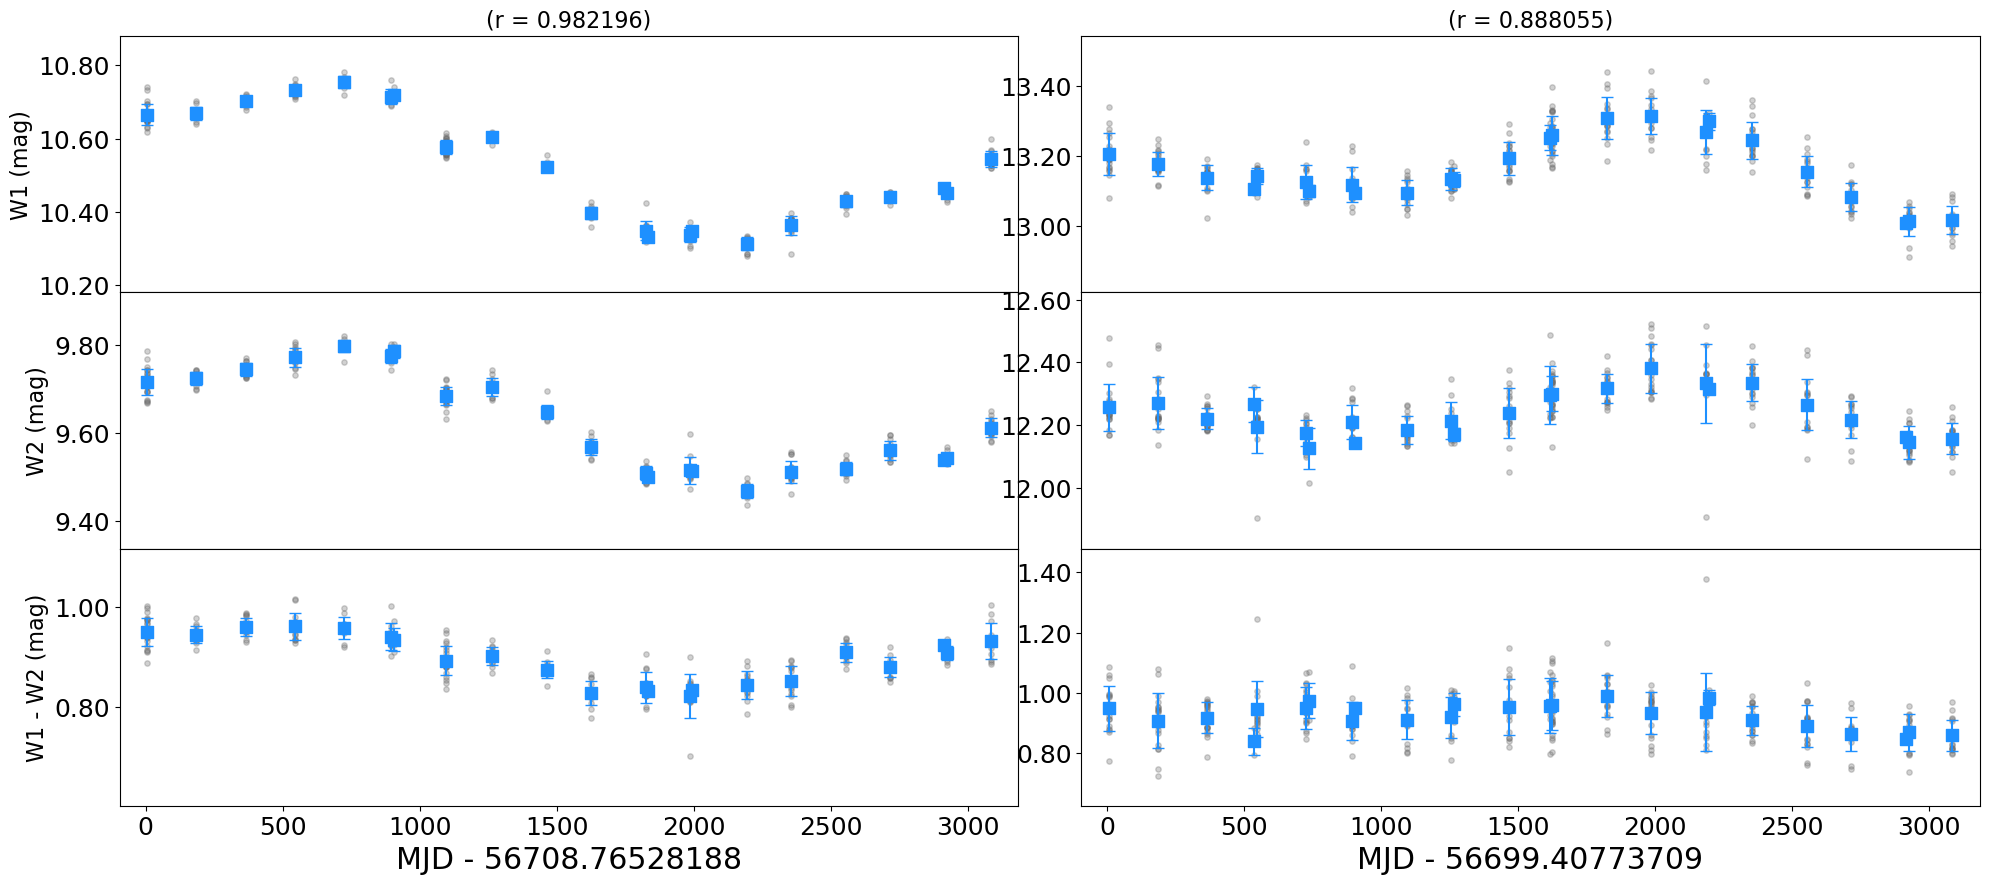

In [23]:
curve_mosaic("Highly Variable Objects with W1-W2 >= 0.8", 686622, 686372, voids_full, walls_full, all_Pr, False)

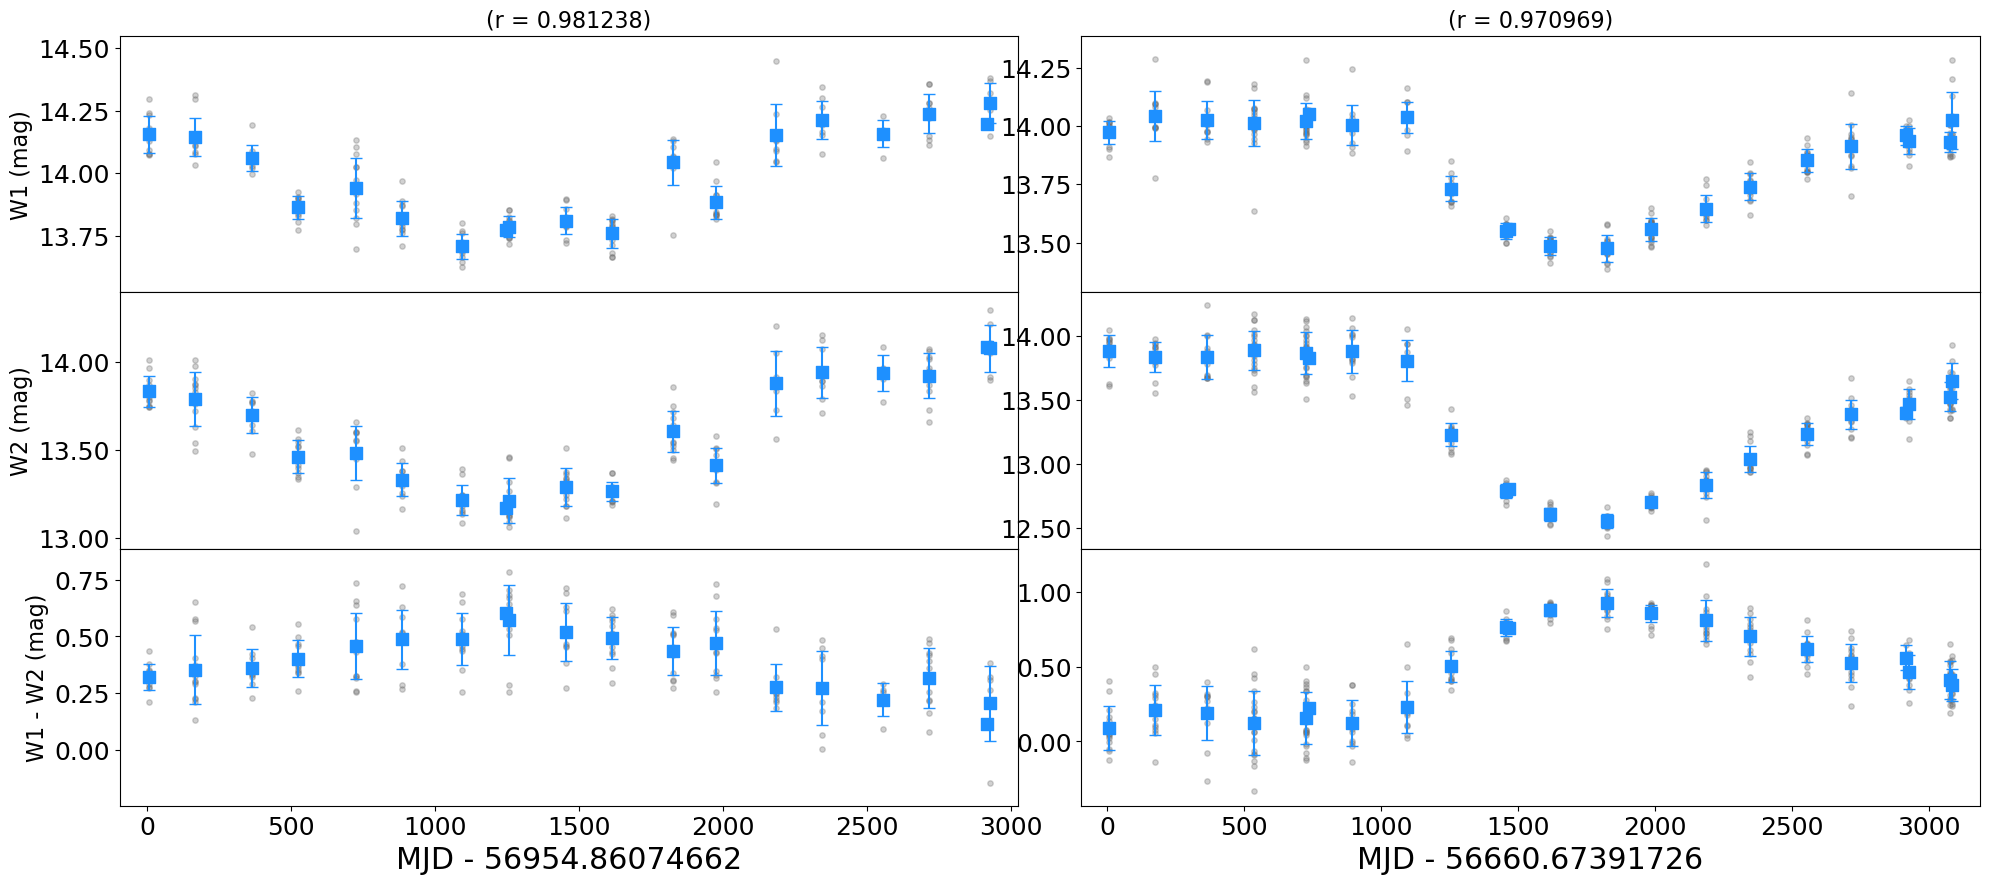

In [24]:
curve_mosaic("Highly Variable Objects with W1-W2 < 0.5", 435718, 552295, voids_full, walls_full, all_Pr, False)

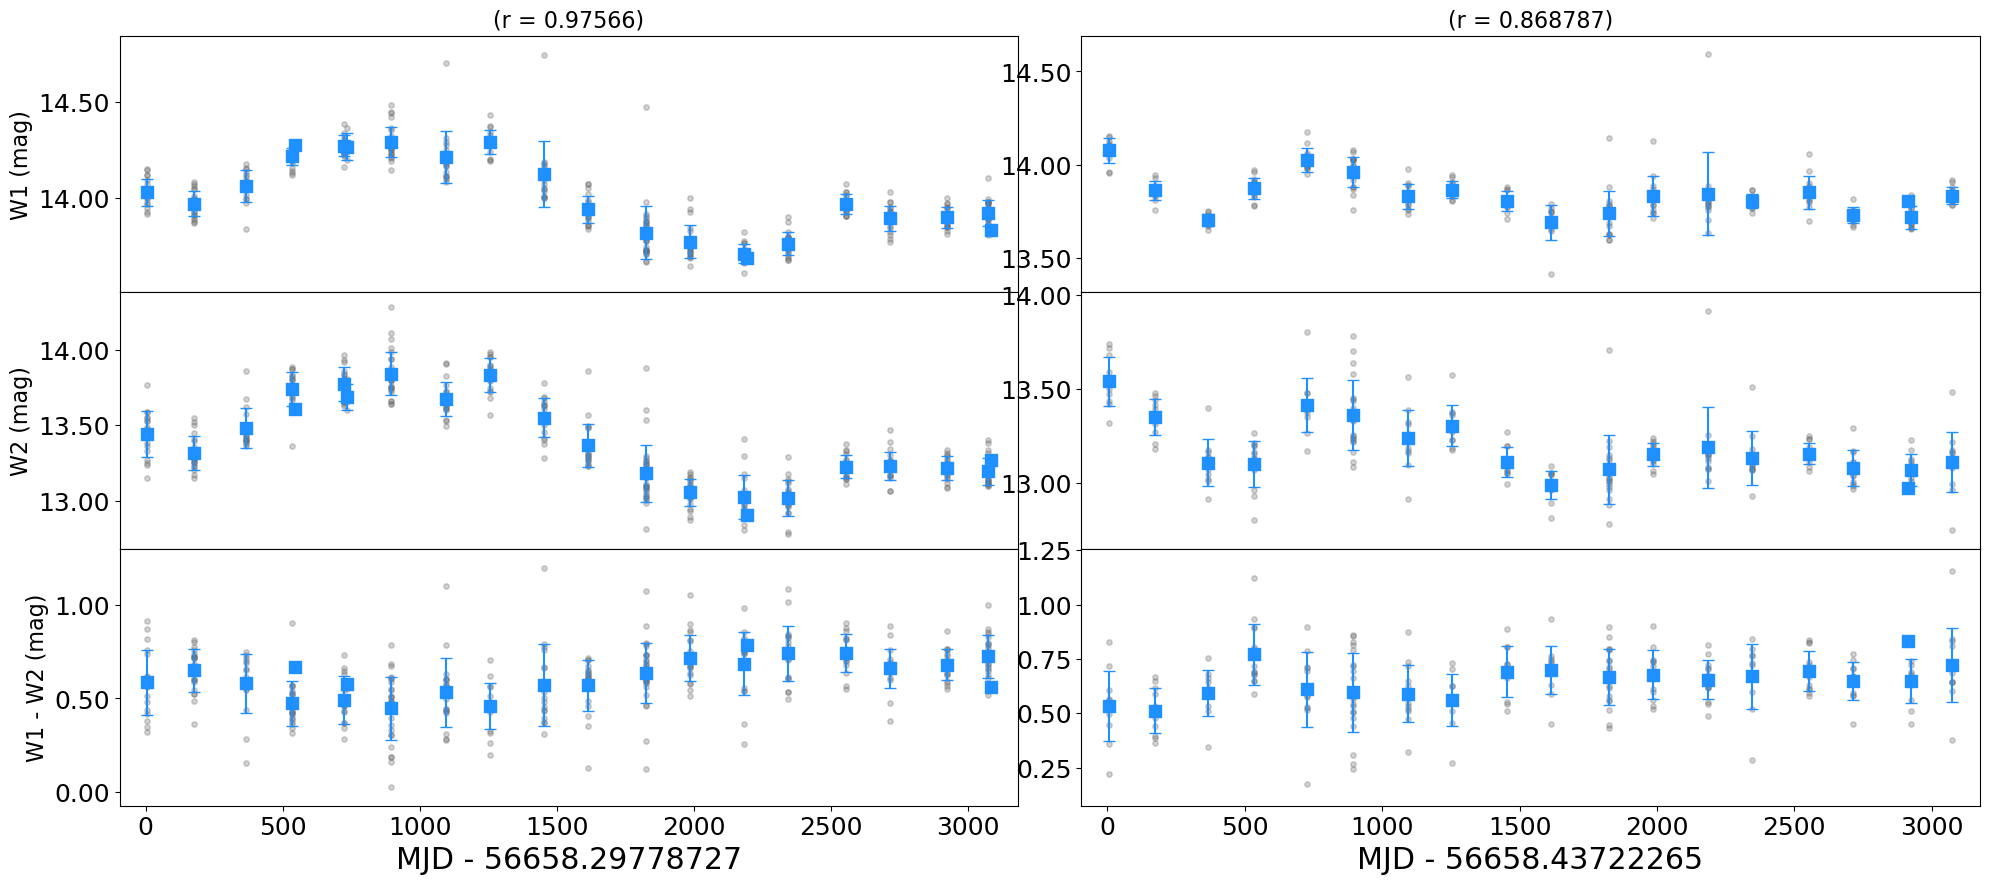

In [25]:
curve_mosaic("Highly Variable Objects with 0.5 < W1-W2 =< 0.8", 604910, 375933, voids_full, walls_full, all_Pr, False)

r = 0.825336


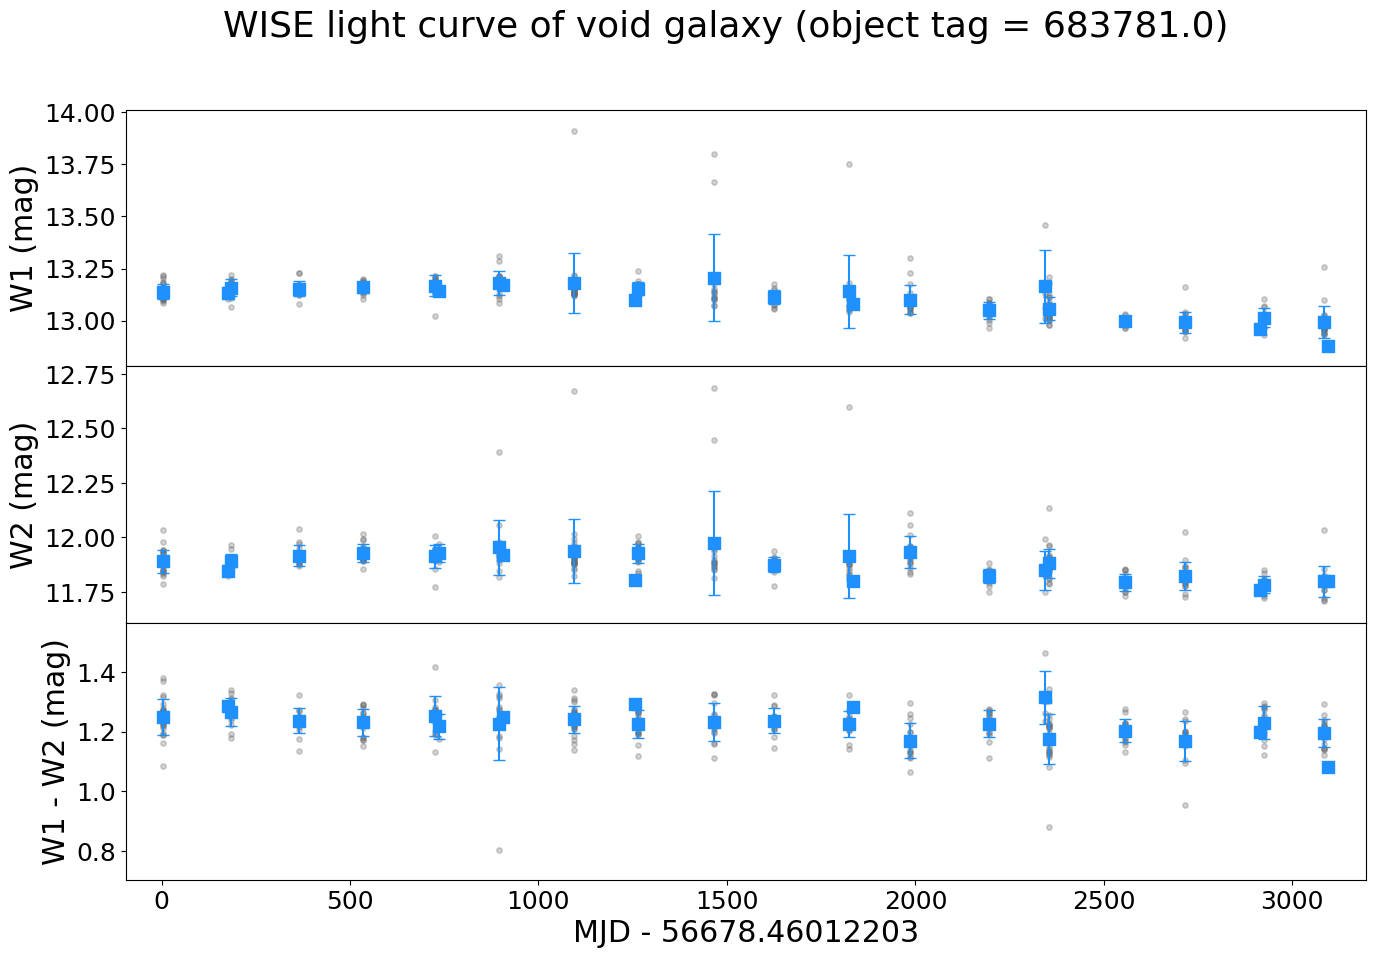

In [26]:
tag_num = 683781.0

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, voids_full, False)

# main wall, 0.5 < W1 - W2 < 0.8

r = 0.981238


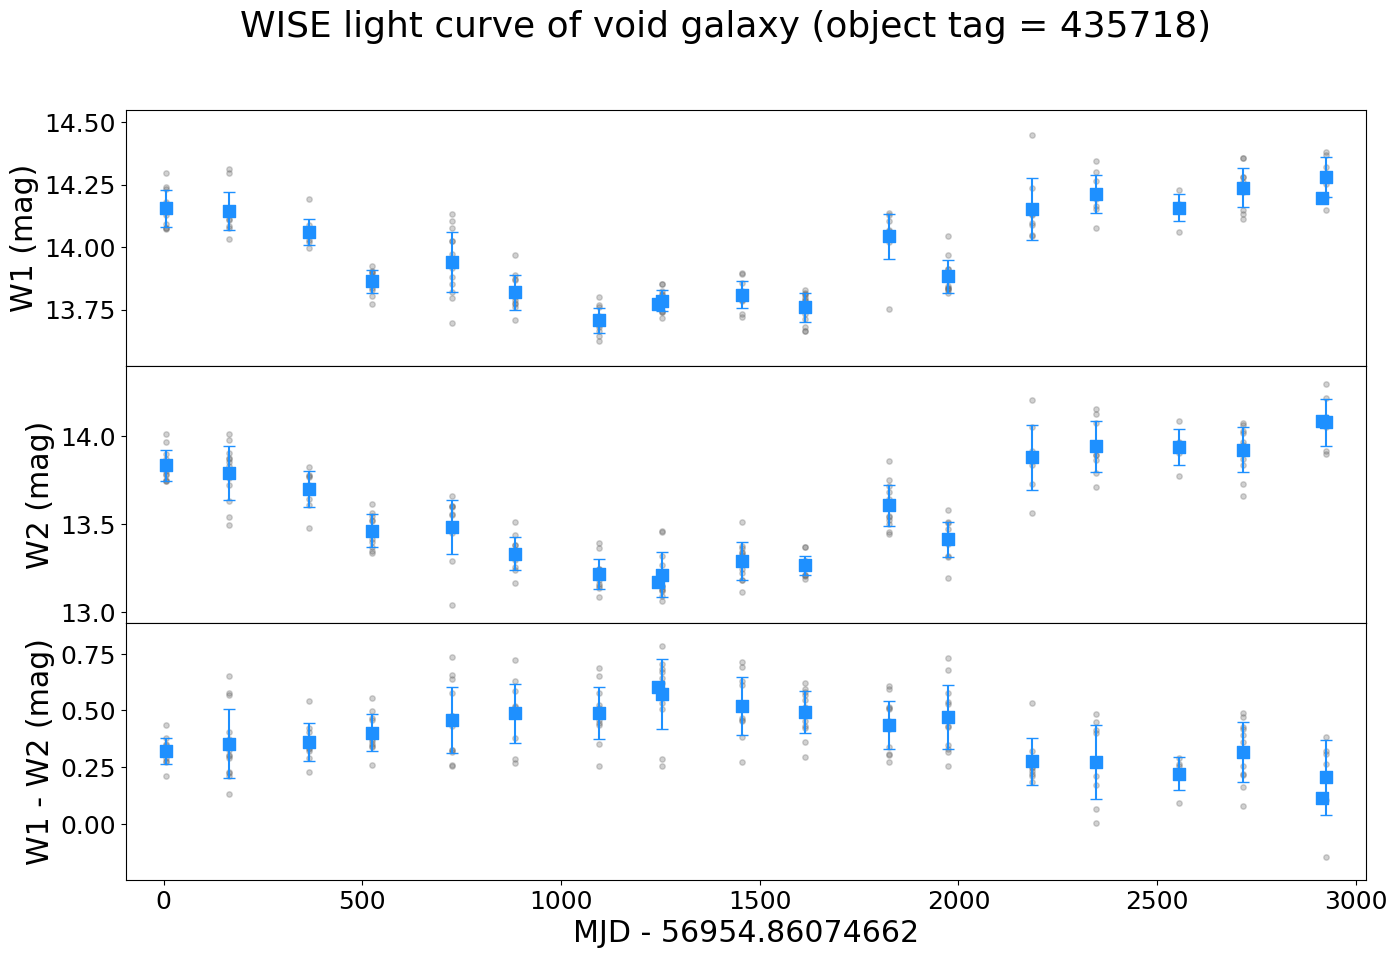

In [27]:
tag_num = 435718

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, voids_full, False)

In [28]:
# def curve_mosaic(title_fig, num_v, num_w, voids_full, walls_full, all_Pr, save,):
#     fig, axs = plt.subplots(3, 2, figsize = (24, 10), sharex = 'col')

# #     fig.suptitle(title_fig, fontsize = 'x-large')

# #     sub_curve(num_v, voids_full, "void", axs[0, 0], axs[1, 0], axs[2, 0], all_Pr)

#     sub_curve(num_w, walls_full, "wall", axs[0, 1], axs[1, 1], axs[2, 1], all_Pr)

#     axs[0, 0].set_ylabel('W1 (mag)', fontsize = 'large')
#     axs[1, 0].set_ylabel('W2 (mag)', fontsize = 'large')
#     axs[2, 0].set_ylabel('W1 - W2 (mag)', fontsize = 'large')

#     plt.subplots_adjust(wspace = 0.07, hspace = 0)
    
#     if(save == True):
#         fig.savefig('/Users/anisharadhey/Dropbox/voids_Anish/Figures/curve-mosaic' + str(num_v) + '_' + str(num_w) + '.png', dpi = 600)

#     plt.show()

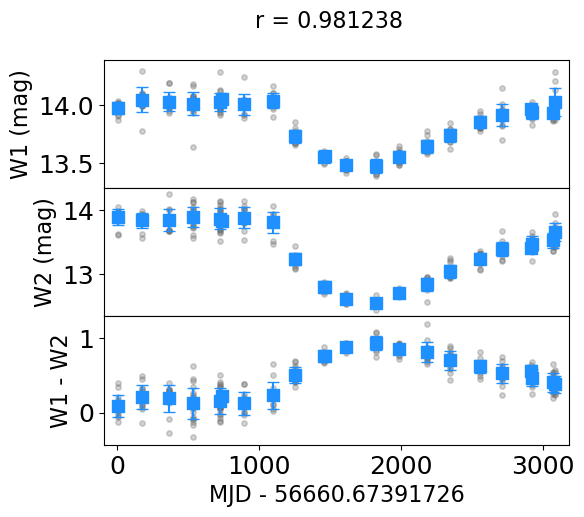

In [29]:
t = 552295

full = walls_full

save = False

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
# print('r = ' + test_r.to_string(index = False))

full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# define three vertically-stackd subplots
fig, axs = plt.subplots(3, 1, 
                        figsize = (6, 5),
                        sharex = 'col', 
                        sharey = 'row'
                       )

plt.subplots_adjust(wspace = 0, hspace = 0)

# add title that automatically includes the name of the plotted object
fig.suptitle('r = ' + test_r.to_string(index = False), fontsize = 16)

# scatter individual measurements using the full_tag table
# different colors and bands are used for each subplot
axs[0].scatter(full_tag['mjd_binned'], 
               full_tag['w1mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

axs[1].scatter(full_tag['mjd_binned'], 
               full_tag['w2mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

axs[2].scatter(full_tag['mjd_binned'], 
               full_tag['W1-W2'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

# scatter the mean points on top of the individual measurements, all on the same binned x-values
axs[0].scatter(mean['mjd_binned'], 
               mean['mean_W1'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

axs[1].scatter(mean['mjd_binned'], 
               mean['mean_W2'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

axs[2].scatter(mean['mjd_binned'], 
               mean['mean_color'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

# add error bars for means using the standard deviations calculated in the mean table
axs[0].errorbar(mean['mjd_binned'], 
                mean['mean_W1'],
                yerr = mean['std_W1'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

axs[1].errorbar(mean['mjd_binned'], 
                mean['mean_W2'],
                yerr = mean['std_W2'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

axs[2].errorbar(mean['mjd_binned'], 
                mean['mean_color'],
                yerr = mean['std_color'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

# automatically set the axis limits for the graph based on the range of the plotted data
axs[0].set_xlim([mean['mjd_binned'].min() - 100, mean['mjd_binned'].max() + 100])
axs[0].set_ylim([full_tag['w1mpro'].min() - 0.1, full_tag['w1mpro'].max() + 0.1])
axs[1].set_ylim([full_tag['w2mpro'].min() - 0.1, full_tag['w2mpro'].max() + 0.1])
axs[2].set_ylim([full_tag['W1-W2'].min() - 0.1, full_tag['W1-W2'].max() + 0.1])

# only label the outermost axes
for ax in axs.flat:
    ax.label_outer()

# set all axis labels, including mjd that autmatically includes the value we subtracted in order to start at zero
axs[0].set_ylabel('W1 (mag)', fontsize = 16)
axs[1].set_ylabel('W2 (mag)', fontsize = 16)
axs[2].set_ylabel('W1 - W2', fontsize = 16)
axs[2].set_xlabel('MJD - ' + str(full_tag['mjd'].min()), fontsize = 16)

#     axs[0].set_yticklabels(tick_labels.astype(int))

# save figure in a unique file for each object tag

plt.rcParams.update({'font.size': 16})

if(save == True):
    fig.savefig('Figures/SVRSEF_light-curve-' + str(t) + '.png', bbox_inches = 'tight', dpi = 600)

plt.show()

r = 0.925092


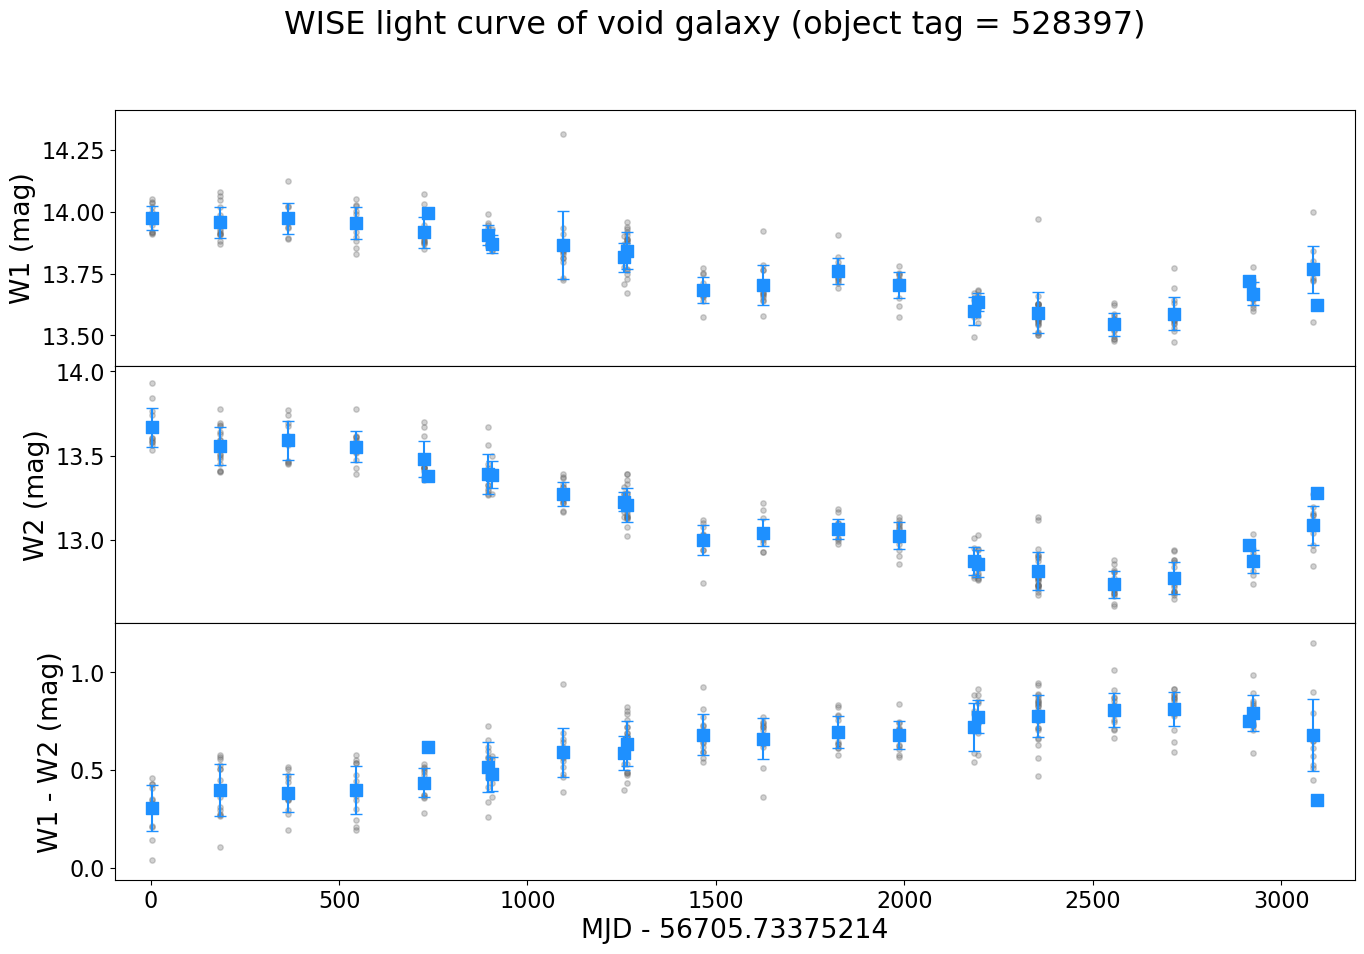

In [30]:
# Test for animation

tag_num = 528397

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
print('r = ' + test_r.to_string(index = False))

light_curve(tag_num, voids_full, False)

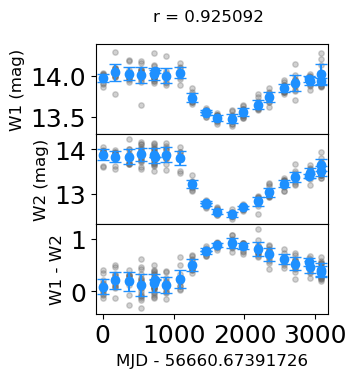

In [31]:
t = 552295

full = walls_full

save = False

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
# print('r = ' + test_r.to_string(index = False))

full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# define three vertically-stackd subplots
fig, axs = plt.subplots(3, 1, 
                        figsize = (3, 3.5),
                        sharex = 'col', 
                        sharey = 'row'
                       )

plt.subplots_adjust(wspace = 0, hspace = 0)

# add title that automatically includes the name of the plotted object
fig.suptitle('r = ' + test_r.to_string(index = False), fontsize = 12)

# scatter individual measurements using the full_tag table
# different colors and bands are used for each subplot
axs[0].scatter(full_tag['mjd_binned'], 
               full_tag['w1mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

axs[1].scatter(full_tag['mjd_binned'], 
               full_tag['w2mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

axs[2].scatter(full_tag['mjd_binned'], 
               full_tag['W1-W2'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

# scatter the mean points on top of the individual measurements, all on the same binned x-values
axs[0].scatter(mean['mjd_binned'], 
               mean['mean_W1'], 
               s = 20, 
               c = 'dodgerblue',
               marker = "s")

axs[1].scatter(mean['mjd_binned'], 
               mean['mean_W2'], 
               s = 20, 
               c = 'dodgerblue',
               marker = "s")

axs[2].scatter(mean['mjd_binned'], 
               mean['mean_color'], 
               s = 20, 
               c = 'dodgerblue',
               marker = "s")

# add error bars for means using the standard deviations calculated in the mean table
axs[0].errorbar(mean['mjd_binned'], 
                mean['mean_W1'],
                yerr = mean['std_W1'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

axs[1].errorbar(mean['mjd_binned'], 
                mean['mean_W2'],
                yerr = mean['std_W2'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

axs[2].errorbar(mean['mjd_binned'], 
                mean['mean_color'],
                yerr = mean['std_color'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

# automatically set the axis limits for the graph based on the range of the plotted data
axs[0].set_xlim([mean['mjd_binned'].min() - 100, mean['mjd_binned'].max() + 100])
axs[0].set_ylim([full_tag['w1mpro'].min() - 0.1, full_tag['w1mpro'].max() + 0.1])
axs[1].set_ylim([full_tag['w2mpro'].min() - 0.1, full_tag['w2mpro'].max() + 0.1])
axs[2].set_ylim([full_tag['W1-W2'].min() - 0.1, full_tag['W1-W2'].max() + 0.1])

# only label the outermost axes
for ax in axs.flat:
    ax.label_outer()

# set all axis labels, including mjd that autmatically includes the value we subtracted in order to start at zero
axs[0].set_ylabel('W1 (mag)', fontsize = 12)
axs[1].set_ylabel('W2 (mag)', fontsize = 12)
axs[2].set_ylabel('W1 - W2', fontsize = 12)
axs[2].set_xlabel('MJD - ' + str(full_tag['mjd'].min()), fontsize = 12)

#     axs[0].set_yticklabels(tick_labels.astype(int))

# save figure in a unique file for each object tag

plt.rcParams.update({'font.size': 12})

# fig.savefig('Figures/quad_light-curve-' + str(t) + '.png', bbox_inches = 'tight', dpi = 600)

plt.show()

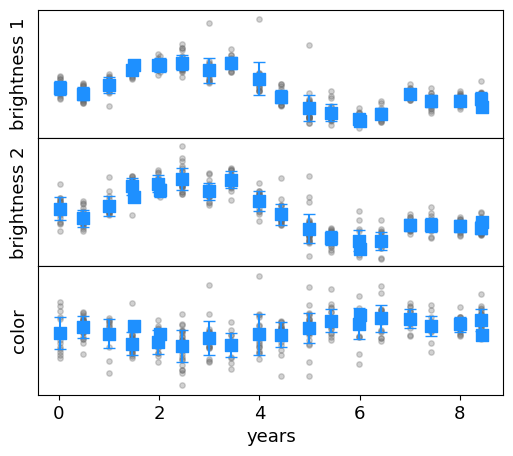

In [49]:
# FOR PRESS RELEASE

t = 604910

days_year = 365.2422

full = voids_full

save = False

test_r = all_Pr[(all_Pr['object_tag'] == tag_num)]['Pr']
# print('r = ' + test_r.to_string(index = False))

full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

# define three vertically-stackd subplots
fig, axs = plt.subplots(3, 1, 
                        figsize = (6, 5),
                        sharex = 'col', 
                        sharey = 'row'
                       )

plt.subplots_adjust(wspace = 0, hspace = 0)

# add title that automatically includes the name of the plotted object
# fig.suptitle('r = ' + test_r.to_string(index = False), fontsize = 16)

# scatter individual measurements using the full_tag table
# different colors and bands are used for each subplot
axs[0].scatter(full_tag['mjd_binned'] / days_year, 
               full_tag['w1mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

axs[1].scatter(full_tag['mjd_binned'] / days_year, 
               full_tag['w2mpro'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

axs[2].scatter(full_tag['mjd_binned'] / days_year, 
               full_tag['W1-W2'], 
               s = 15, 
               c = 'dimgray',
               marker = "o",
               alpha = 0.3)

# scatter the mean points on top of the individual measurements, all on the same binned x-values
axs[0].scatter(mean['mjd_binned'] / days_year, 
               mean['mean_W1'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

axs[1].scatter(mean['mjd_binned'] / days_year, 
               mean['mean_W2'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

axs[2].scatter(mean['mjd_binned'] / days_year, 
               mean['mean_color'], 
               s = 65, 
               c = 'dodgerblue',
               marker = "s")

# add error bars for means using the standard deviations calculated in the mean table
axs[0].errorbar(mean['mjd_binned'] / days_year, 
                mean['mean_W1'],
                yerr = mean['std_W1'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

axs[1].errorbar(mean['mjd_binned'] / days_year, 
                mean['mean_W2'],
                yerr = mean['std_W2'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

axs[2].errorbar(mean['mjd_binned'] / days_year, 
                mean['mean_color'],
                yerr = mean['std_color'],
                c = "dodgerblue",
                ecolor = "dodgerblue",
                capsize = 4,
                fmt = "o")

# automatically set the axis limits for the graph based on the range of the plotted data
# axs[0].set_xlim([mean['mjd_binned'].min() - 100, mean['mjd_binned'].max() + 100])
axs[0].set_ylim([full_tag['w1mpro'].min() - 0.1, full_tag['w1mpro'].max() + 0.1])
axs[1].set_ylim([full_tag['w2mpro'].min() - 0.1, full_tag['w2mpro'].max() + 0.1])
axs[2].set_ylim([full_tag['W1-W2'].min() - 0.1, full_tag['W1-W2'].max() + 0.1])

# only label the outermost axes
for ax in axs.flat:
    ax.label_outer()

# set all axis labels, including mjd that autmatically includes the value we subtracted in order to start at zero
axs[0].set_ylabel('brightness 1')
axs[1].set_ylabel('brightness 2')
axs[2].set_ylabel('color')
# axs[2].set_xlabel('MJD - ' + str(full_tag['mjd'].min()), fontsize = 16)

axs[2].set_xlabel('years')

#     axs[0].set_yticklabels(tick_labels.astype(int))

# save figure in a unique file for each object tag

plt.rcParams.update({'font.size': 13})

# axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_yticks([])
axs[2].set_yticks([])

# if(save == True):
fig.savefig('Figures/PRESS_light-curve-' + str(t) + '.png', bbox_inches = 'tight', dpi = 600)

plt.show()